In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from plotting import plotTF, plotTFs
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']
cmap = ListedColormap([np.array([0, 114.0/256, 178.0/256, 1]),
                       np.array([0, 158.0/256, 115.0/256, 1]),
                       np.array([213.0/256, 94.0/256, 0, 1]),
                       np.array([204.0/256, 121.0/256, 167.0/256, 1]),
                       np.array([86.0/256, 180.0/256, 233.0/256, 1])])

In [2]:
Data1 = np.loadtxt('NorthFSSTF_10to100_29-05-2019_174319.txt')
Data2 = np.loadtxt('NorthFSSTF_100to1k_29-05-2019_173611.txt')
Data3 = np.loadtxt('NorthFSSTF_1kto10k_29-05-2019_172836.txt')
Data4 = np.loadtxt('NorthFSSTF_10kto100k_29-05-2019_165537.txt')
Data5 = np.loadtxt('NorthFSSTF_100kto900k_29-05-2019_163729.txt')
Data = np.concatenate((Data1,Data2[1:,:],Data3[1:,:],Data4[1:,:],Data5[1:,:]))

In [3]:
ff = Data[:,0]
Meas = (10**(Data[:,1]/20))*np.exp(1j*Data[:,2]*np.pi/180)
G1=-392/124          #Gain of stage across which OUT1 and OUT2 are present
G2=-392/1.2e3        #Gain of excitation signal in the same stage
Gol = 1 - G2*Meas    #Measurement was taken by EXC/OUT2

In [4]:
fug = ff[800+np.argmin(np.abs(np.abs(Gol[800:])-1))]/1e3

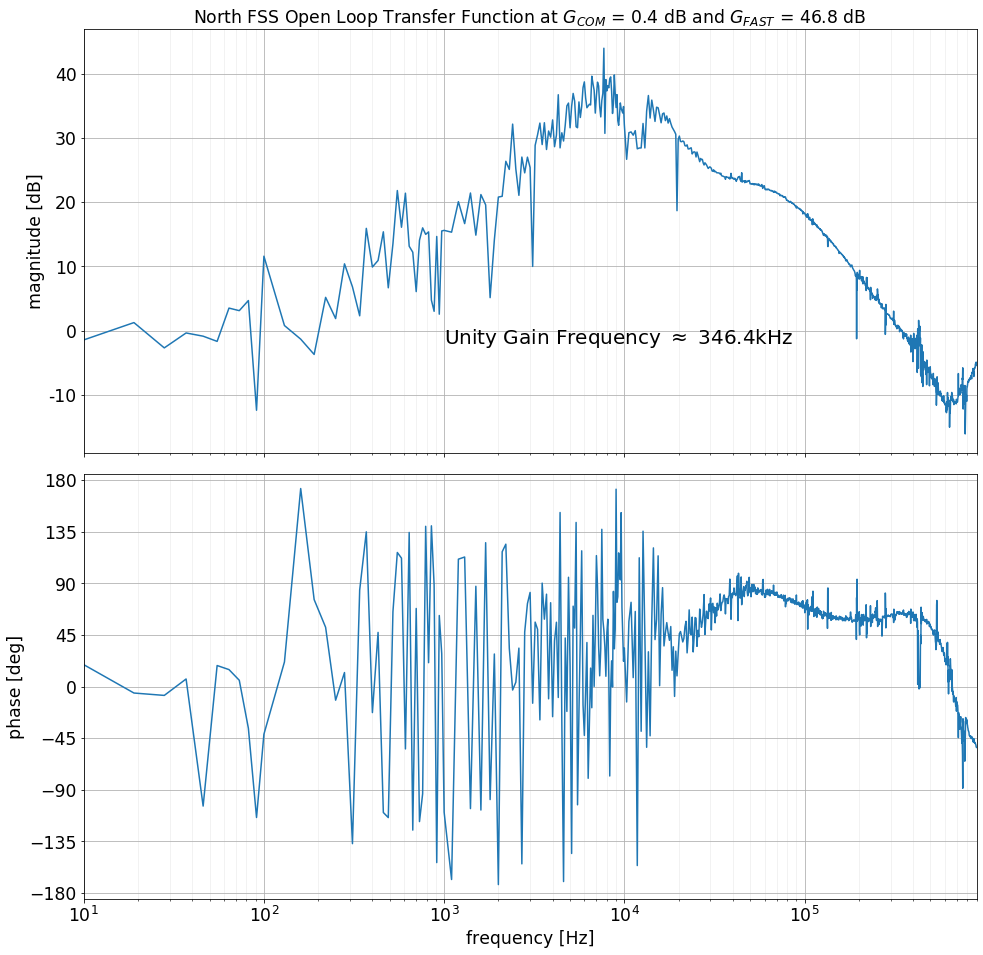

In [5]:
fig = plotTF(ff,Gol,figsize=[16,16],dB=True)
fig.axes[0].set_title('North FSS Open Loop Transfer Function at $G_{COM}$ = 0.4 dB and $G_{FAST}$ = 46.8 dB')
fig.axes[0].text(1e3,-2,r'Unity Gain Frequency $\approx$ '+str(np.round(fug,2))+ 'kHz',FontSize=20)
figlist +=[fig]

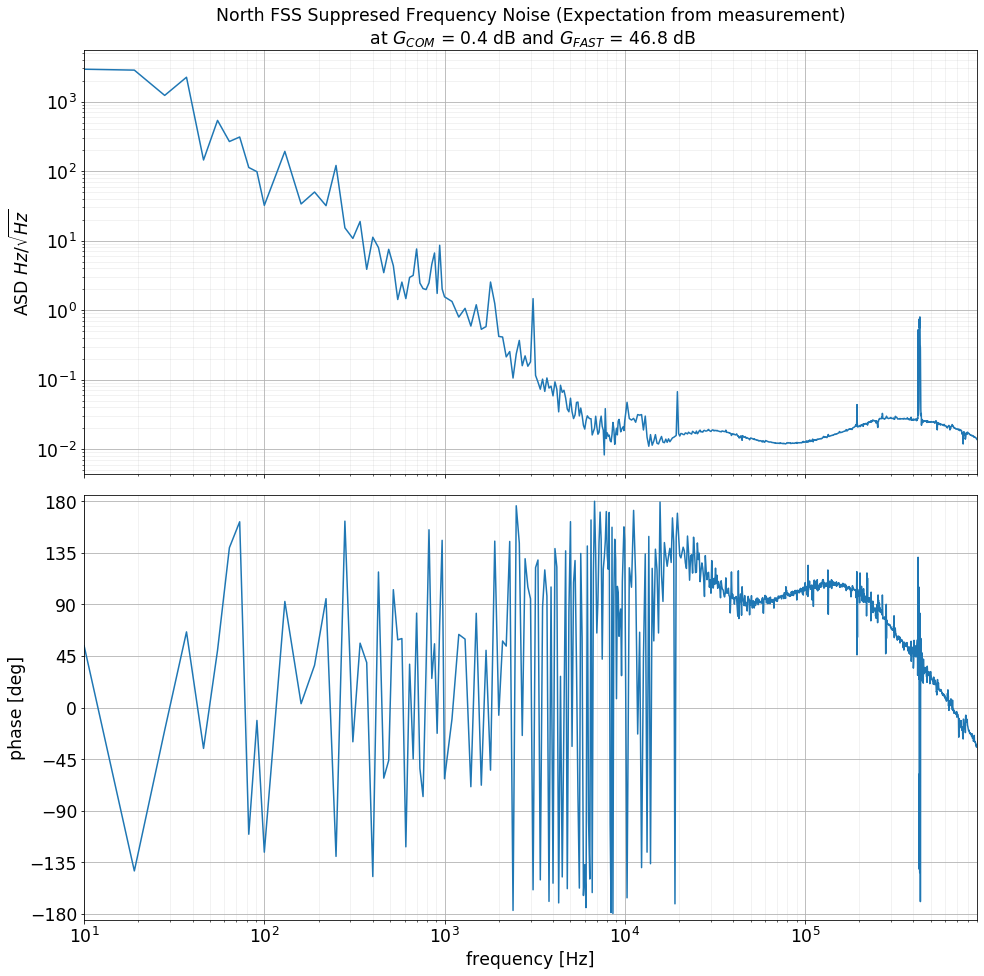

In [6]:
fig = plotTF(ff,(10.0**4/ff)/(1-Gol),figsize=[16,16])
fig.axes[0].set_title('North FSS Suppresed Frequency Noise (Expectation from measurement)\n at $G_{COM}$ = 0.4 dB and $G_{FAST}$ = 46.8 dB')
fig.axes[0].set_ylabel('ASD $Hz/\sqrt{Hz}$')
figlist +=[fig]

In [7]:
Data6 = np.loadtxt('NorthFSSCrossover_10kto100k_29-05-2019_183604.txt')
Cross = (10**(Data6[:,1]/20))*np.exp(1j*Data6[:,2]*np.pi/180)
ff = Data6[:,0]

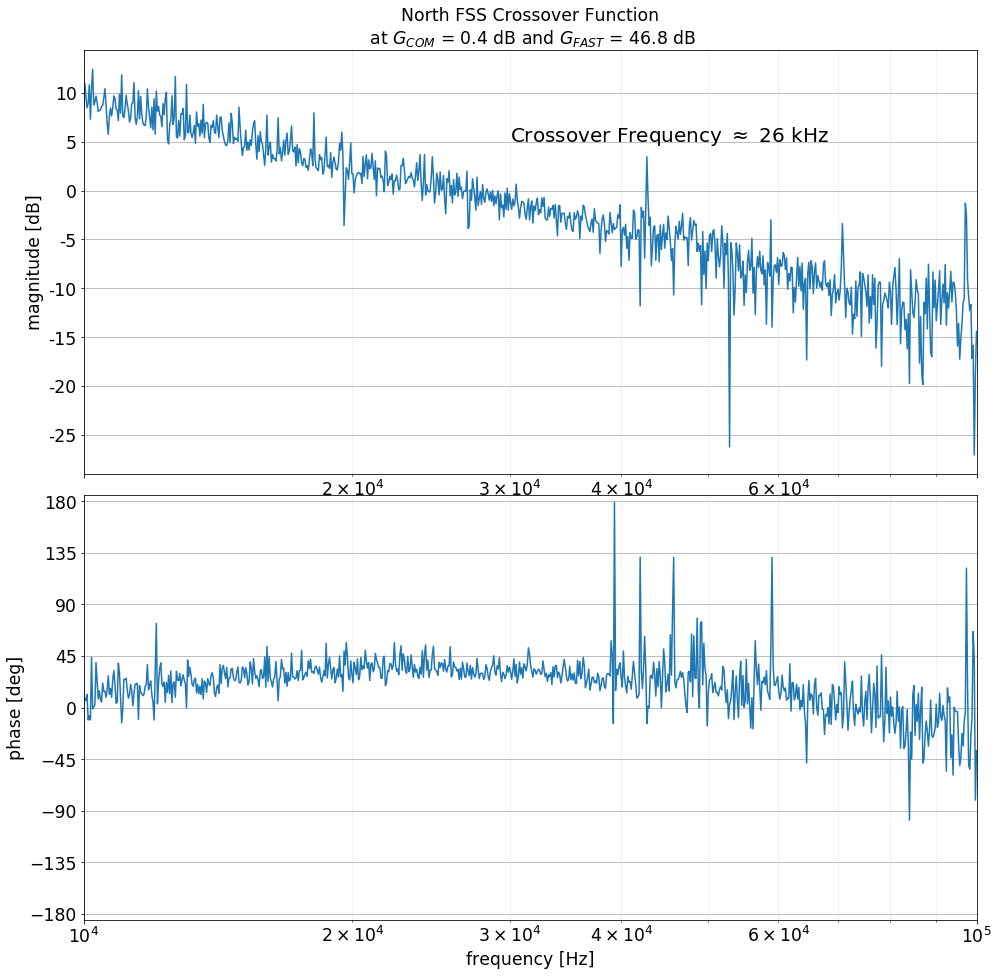

In [8]:
fig = plotTF(ff,Cross,figsize=[16,16],dB=True)
fig.axes[0].set_title('North FSS Crossover Function\n at $G_{COM}$ = 0.4 dB and $G_{FAST}$ = 46.8 dB')
fig.axes[0].text(3e4,5,r'Crossover Frequency $\approx$ 26 kHz ',FontSize=20)
figlist +=[fig]

In [9]:
pp = PdfPages('North_FSS_TF_Measurement_2019-05-29.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()